# (12) Save hf params + STA

**Motivation**: Looked at ```clu044``` (Yuwei) and ```ytu295``` (Nardin) and saved their hyperflow (6) + center (2) params. Some STAs look good in Nardin data. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from analysis.opticflow import *
from figures.fighelper import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from scipy import io as sio
from skimage.transform import resize
from analysis.linear import compute_sta

## Yuwei

Using experiment ```clu044```

In [3]:
path = '/home/hadi/Documents/MTMST-other/Yuwei/MTproject_data/xtracted'
expt = 'tres25_clu044.mat'
file = sio.loadmat(pjoin(path, expt))

In [4]:
file['partition'], file['diameter']

(array([[    0, 19200, 38400, 57600, 76800]], dtype=int32),
 array([[10, 10, 10, 10]], dtype=uint8))

In [5]:
file['opticflows'].shape, file['centerx'].shape, file['centery'].shape

((76800, 6), (76800, 1), (76800, 1))

In [6]:
diameter = float(np.unique(file['diameter']).item())
params = np.array(file['opticflows'], dtype=float)
center = np.concatenate([file['centerx'], file['centery']], axis=1).astype(float)

# save
fname = f"Yuwei_{expt.split('.')[0].split('_')[1]}.npy"
data = {'params': params, 'center': center}
np.save(pjoin(tmp_dir, fname), data)

spks = np.array(file['spks'], dtype=float)
mask = ~np.array(file['badspks'], dtype=bool)
good = np.where(mask)[0]
len(good) / len(spks)

0.815078125

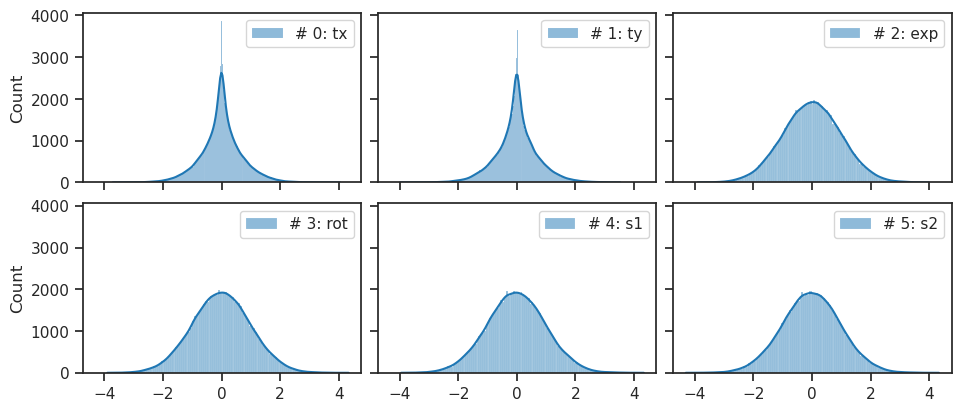

In [7]:
params_dict = {
    0: 'tx',
    1: 'ty',
    2: 'exp',
    3: 'rot',
    4: 's1',
    5: 's2',
}
fig, axes = create_figure(2, 3, (9.5, 4), 'all', 'all', layout='constrained')
for i in range(6):
    ax = axes.flat[i]
    sns.histplot(params[:, i], kde=True, label=f"# {i}: {params_dict[i]}", ax=ax)
    ax.legend()
plt.show()

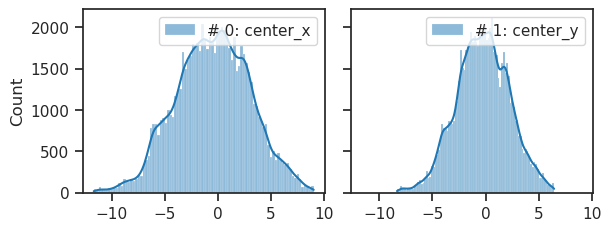

In [8]:
center_dict = {
    0: 'center_x',
    1: 'center_y',
}
fig, axes = create_figure(1, 2, (6, 2.2), 'all', 'all', layout='constrained')
for i in range(2):
    ax = axes.flat[i]
    sns.histplot(center[:, i], kde=True, label=f"# {i}: {center_dict[i]}", ax=ax)
    ax.legend()
plt.show()

In [9]:
center_max = np.max(np.abs(center))
fov = center_max * 2 + diameter
fov = np.ceil(fov) / 2
fov

17.0

In [10]:
hf_kws = {
    'dim': 65,
    'fov': fov,
    'apply_mask': True,
}
hf = HyperFlow(
    params=params,
    center=center,
    diameter=diameter,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}     ||     spatial resolution: {hf.res}")

stim shape: (76800, 2, 65, 65)     ||     spatial resolution: 0.53125

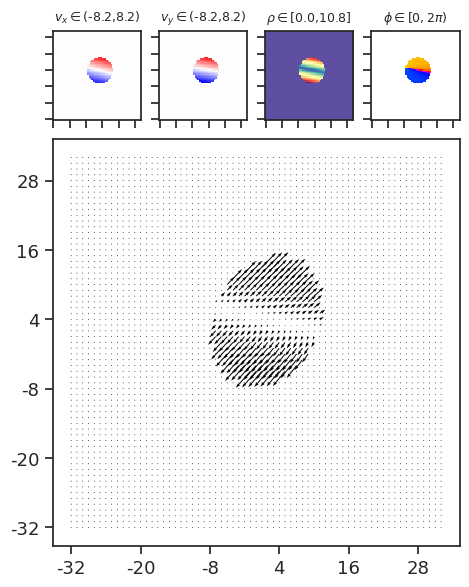

In [11]:
show_opticflow_full(stim[527], tick_spacing=12, scale=200);

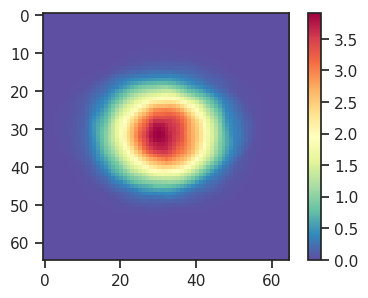

In [12]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

In [13]:
sta = compute_sta(
    n_lags=24,
    stim=stim,
    spks=spks,
    good=good,
    verbose=False,
)
sta = VelField(sta)

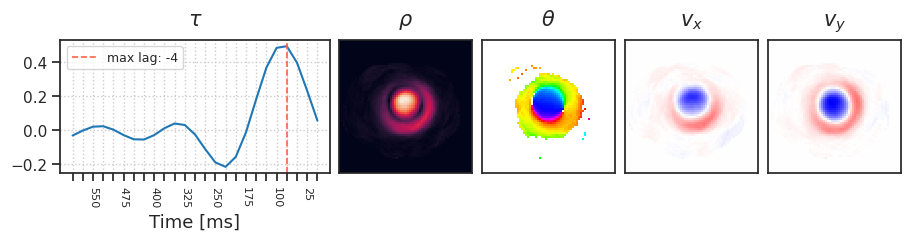

In [14]:
sta.show();

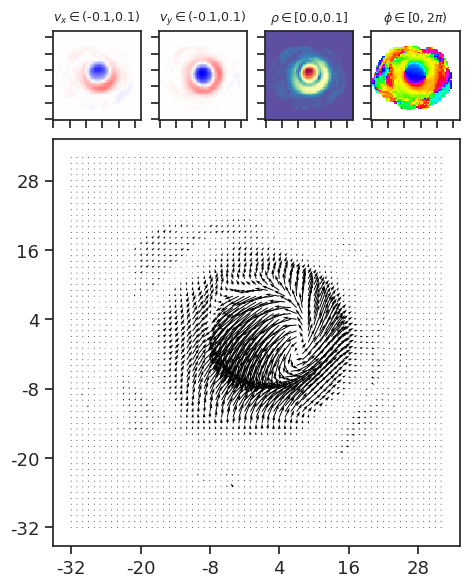

In [15]:
tker, sker = sta.get_kers(0)
show_opticflow_full(sker[0], tick_spacing=12, scale=None);

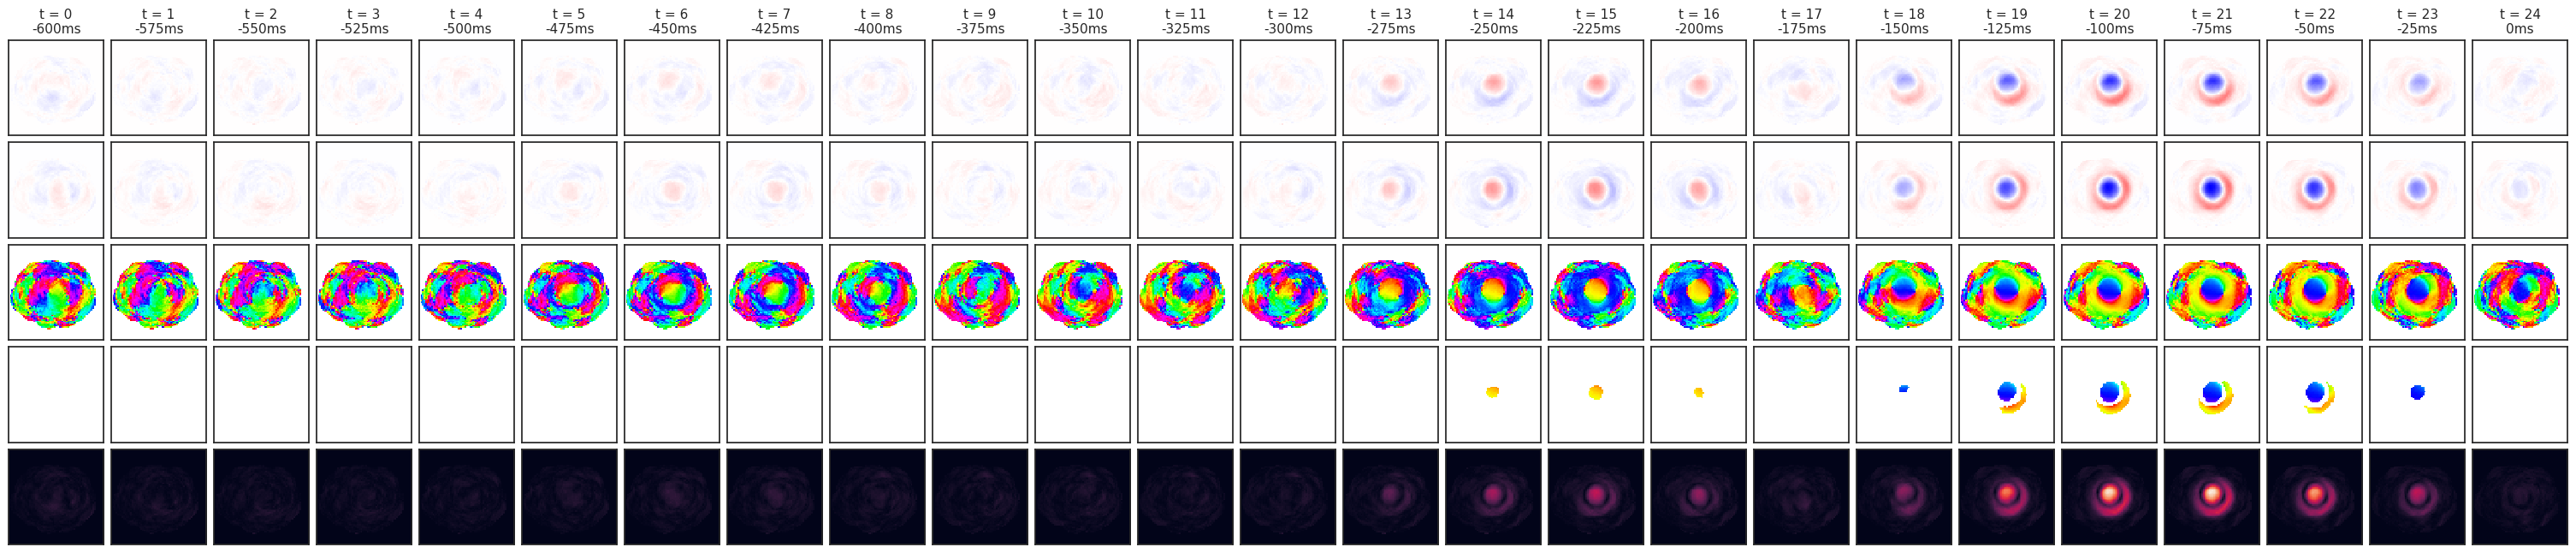

In [16]:
sta.show_full();

## Nardin

Using experiment ```ytu295```

In [17]:
path = '/home/hadi/Documents/MTMST-other/Nardin/MTproject_data/xtracted'
expt = 'tres25_ytu295.mat'
file = sio.loadmat(pjoin(path, expt))

In [18]:
file['partition'], file['diameter']

(array([[    0, 14400, 28800]], dtype=uint16), array([[20, 20]], dtype=uint8))

In [19]:
file['opticflows'].shape, file['centerx'].shape, file['centery'].shape

((28800, 6), (28800, 1), (28800, 1))

In [20]:
diameter = float(np.unique(file['diameter']).item())
params = np.array(file['opticflows'], dtype=float)
center = np.concatenate([file['centerx'], file['centery']], axis=1).astype(float)

# save
fname = f"Nardin_{expt.split('.')[0].split('_')[1]}.npy"
data = {'params': params, 'center': center}
np.save(pjoin(tmp_dir, fname), data)

spks = np.array(file['spks'], dtype=float)
mask = ~np.array(file['badspks'], dtype=bool)
good = np.where(mask)[0]

# Nardin specific
nans = np.isnan(spks)
good_channels = nans.sum(0) == 0

len(good) / len(spks)

0.9453819444444445

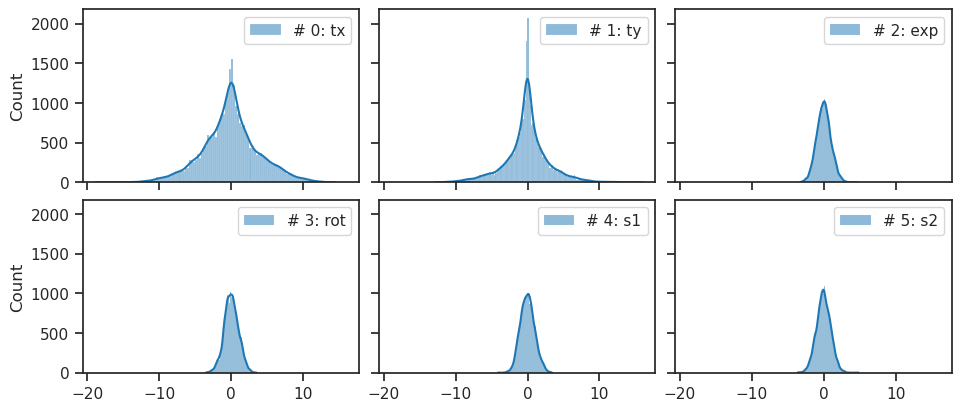

In [21]:
params_dict = {
    0: 'tx',
    1: 'ty',
    2: 'exp',
    3: 'rot',
    4: 's1',
    5: 's2',
}
fig, axes = create_figure(2, 3, (9.5, 4), 'all', 'all', layout='constrained')
for i in range(6):
    ax = axes.flat[i]
    sns.histplot(params[:, i], kde=True, label=f"# {i}: {params_dict[i]}", ax=ax)
    ax.legend()
plt.show()

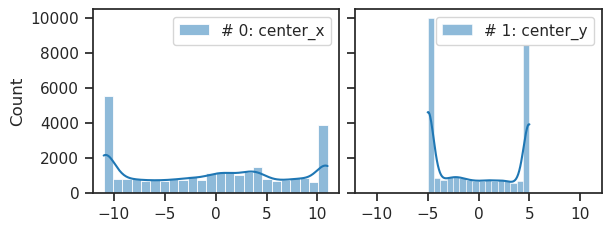

In [22]:
center_dict = {
    0: 'center_x',
    1: 'center_y',
}
fig, axes = create_figure(1, 2, (6, 2.2), 'all', 'all', layout='constrained')
for i in range(2):
    ax = axes.flat[i]
    sns.histplot(center[:, i], kde=True, label=f"# {i}: {center_dict[i]}", ax=ax)
    ax.legend()
plt.show()

In [23]:
center_max = np.max(np.abs(center))
fov = center_max * 2 + diameter
fov = np.ceil(fov) / 2
fov

21.0

In [24]:
hf_kws = {
    'dim': 65,
    'fov': fov,
    'apply_mask': True,
}
hf = HyperFlow(
    params=params,
    center=center,
    diameter=diameter,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}     ||     spatial resolution: {hf.res}")

stim shape: (28800, 2, 65, 65)     ||     spatial resolution: 0.65625

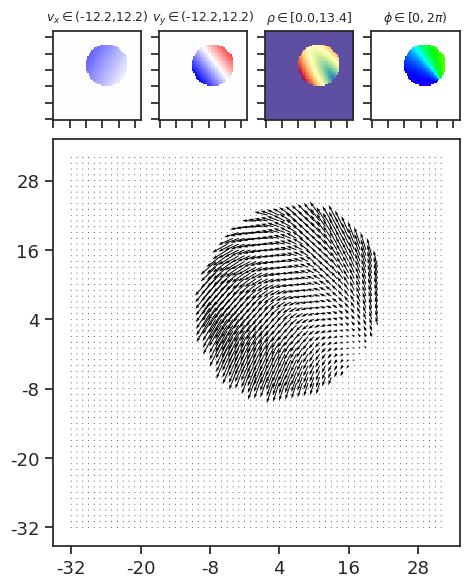

In [25]:
show_opticflow_full(stim[527], tick_spacing=12, scale=200);

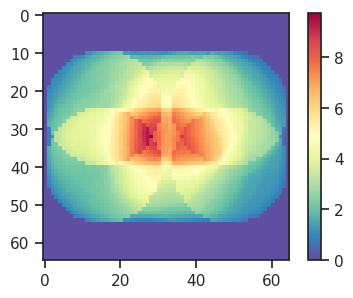

In [26]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

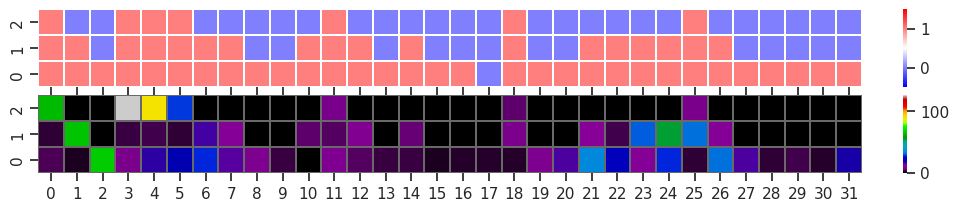

In [27]:
fig, axes = create_figure(2, 1, (9.5, 2.), sharex='all', constrained_layout=True)
sns.heatmap(
    good_channels.T,
    cmap='bwr',
    linewidths=0.01,
    vmin=-0.5,
    vmax=1.5, 
    linecolor='w',
    ax=axes[0],
)
sns.heatmap(
    np.nansum(spks, 0).T / len(spks) / 25e-3,
    cmap='nipy_spectral',
    linewidths=0.01,
    linecolor='dimgrey',
    ax=axes[1],
)
for ax in axes.flat:
    ax.invert_yaxis()
plt.show()

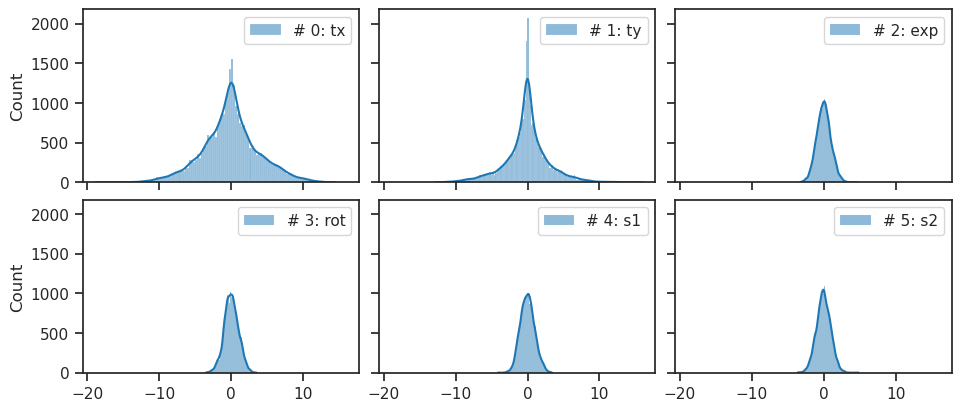

In [28]:
params_dict = {
    0: 'tx',
    1: 'ty',
    2: 'exp',
    3: 'rot',
    4: 's1',
    5: 's2',
}
fig, axes = create_figure(2, 3, (9.5, 4), 'all', 'all', layout='constrained')
for i in range(6):
    ax = axes.flat[i]
    sns.histplot(params[:, i], kde=True, label=f"# {i}: {params_dict[i]}", ax=ax)
    ax.legend()
plt.show()

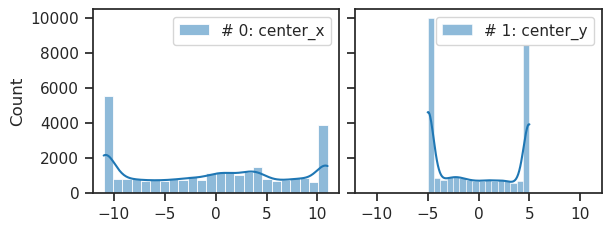

In [29]:
center_dict = {
    0: 'center_x',
    1: 'center_y',
}
fig, axes = create_figure(1, 2, (6, 2.2), 'all', 'all', layout='constrained')
for i in range(2):
    ax = axes.flat[i]
    sns.histplot(center[:, i], kde=True, label=f"# {i}: {center_dict[i]}", ax=ax)
    ax.legend()
plt.show()

In [30]:
spks.shape

(28800, 32, 3)

In [31]:
channel_i = 0

sta = compute_sta(
    n_lags=24,
    stim=stim,
    spks=spks[..., channel_i],
    good=good,
    verbose=True,
)
sta = sta[good_channels[:, channel_i]]
sta.shape

100%|██████████| 27222/27222 [01:15<00:00, 361.05it/s]
/home/hadi/Dropbox/git/_MTMST/analysis/linear.py:294: RuntimeWarning: NaN in STA
  warnings.warn("NaN in STA", RuntimeWarning)


(31, 25, 2, 65, 65)

In [32]:
sta = VelField(sta)

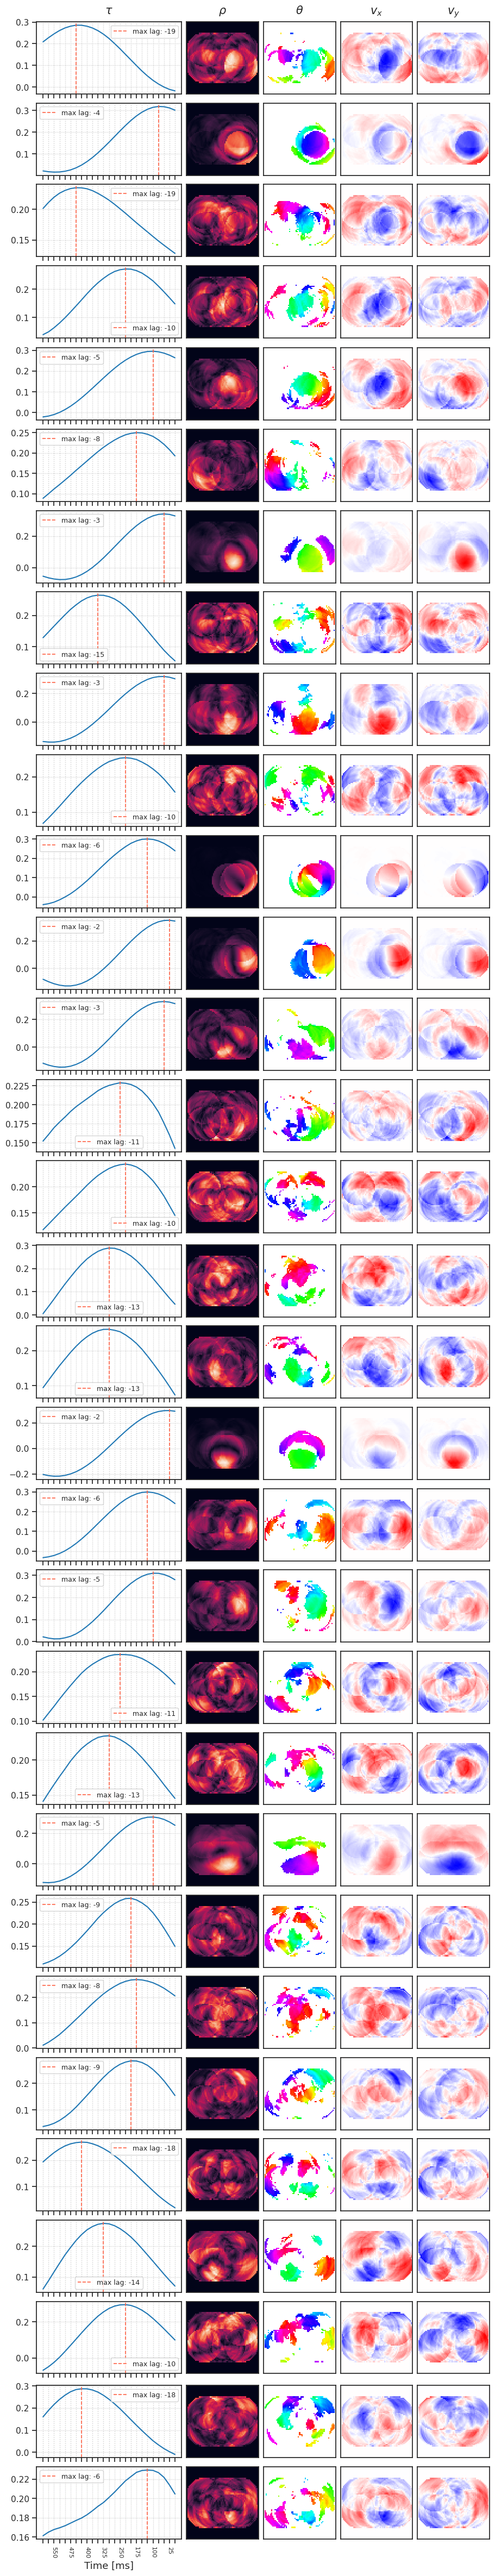

In [33]:
sta.show();

In [34]:
tker, sker = sta.get_kers(0)

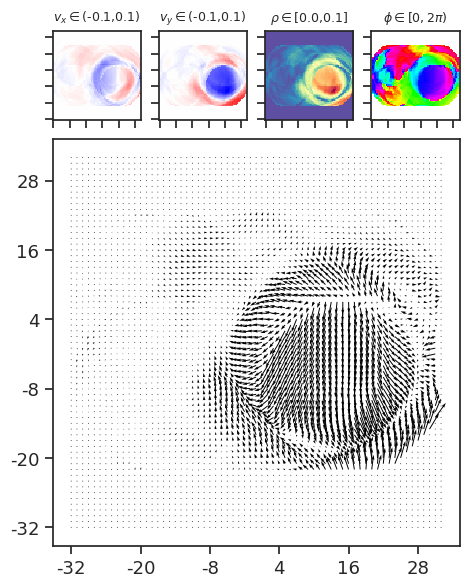

In [35]:
cell_i = 1
show_opticflow_full(sker[cell_i], tick_spacing=12, scale=None);

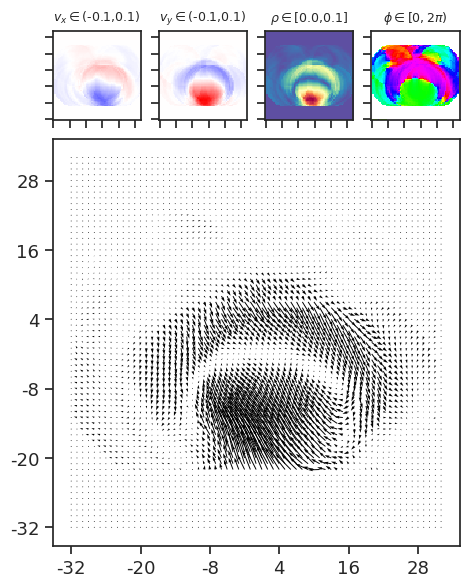

In [36]:
cell_i = 17
show_opticflow_full(sker[cell_i], tick_spacing=12, scale=None);